In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: EA
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


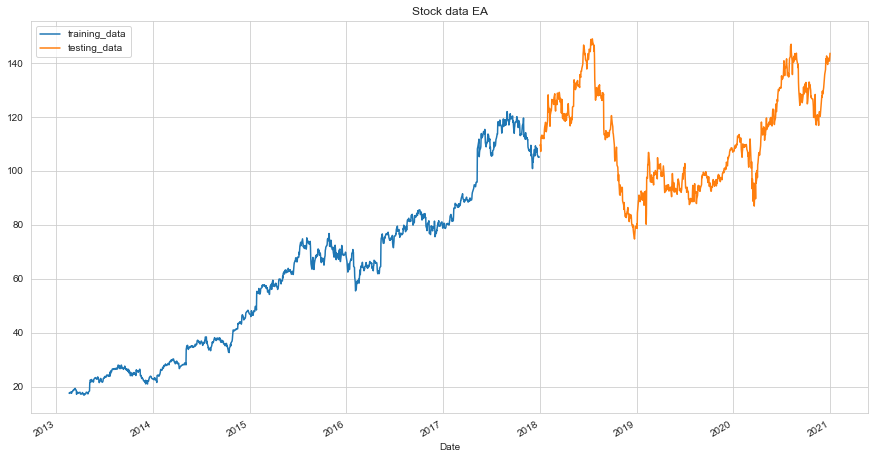

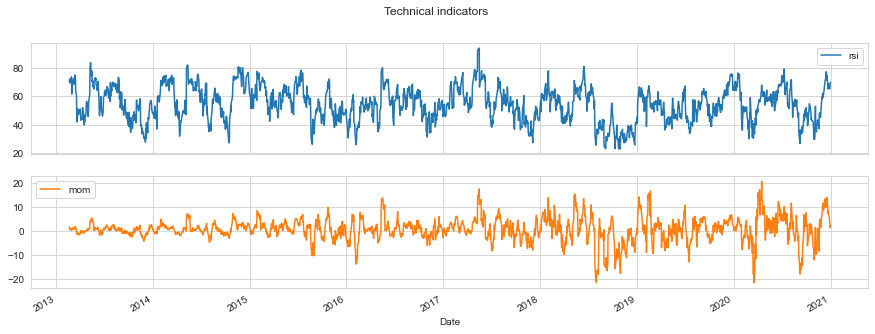

In [2]:
stock_name = 'ea'.upper()
industry = 'Communication Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1822.38, duration: 0:00:00.206059
episode: 2/2000, episode end value: 1825.75, duration: 0:00:00.216049
episode: 3/2000, episode end value: 1804.61, duration: 0:00:00.209042
episode: 4/2000, episode end value: 1816.70, duration: 0:00:00.208036
episode: 5/2000, episode end value: 1816.97, duration: 0:00:00.216063
episode: 6/2000, episode end value: 1818.52, duration: 0:00:00.218036
episode: 7/2000, episode end value: 1817.94, duration: 0:00:00.220061
episode: 8/2000, episode end value: 1810.99, duration: 0:00:00.211048
episode: 9/2000, episode end value: 1808.80, duration: 0:00:00.207046
episode: 10/2000, episode end value: 1817.90, duration: 0:00:00.209047
episode: 11/2000, episode end value: 1806.02, duration: 0:00:00.210035
episode: 12/2000, episode end value: 1817.35, duration: 0:00:00.208052
episode: 13/2000, episode end value: 1810.32, duration: 0:00:00.214035
episode: 14/2000, episode end value: 1806.14, duration: 0:00:00.217050
episode: 15/200

episode: 118/2000, episode end value: 1811.13, duration: 0:00:00.213054
episode: 119/2000, episode end value: 1813.69, duration: 0:00:00.211049
episode: 120/2000, episode end value: 1820.33, duration: 0:00:00.203044
episode: 121/2000, episode end value: 1794.25, duration: 0:00:00.206050
episode: 122/2000, episode end value: 1805.65, duration: 0:00:00.195044
episode: 123/2000, episode end value: 1807.33, duration: 0:00:00.204032
episode: 124/2000, episode end value: 1804.94, duration: 0:00:00.203052
episode: 125/2000, episode end value: 1806.45, duration: 0:00:00.200042
episode: 126/2000, episode end value: 1804.74, duration: 0:00:00.200045
episode: 127/2000, episode end value: 1802.49, duration: 0:00:00.207052
episode: 128/2000, episode end value: 1804.50, duration: 0:00:00.203046
episode: 129/2000, episode end value: 1806.73, duration: 0:00:00.195042
episode: 130/2000, episode end value: 1804.78, duration: 0:00:00.206046
episode: 131/2000, episode end value: 1820.22, duration: 0:00:00

episode: 232/2000, episode end value: 1813.93, duration: 0:00:00.198044
episode: 233/2000, episode end value: 1818.03, duration: 0:00:00.197044
episode: 234/2000, episode end value: 1804.48, duration: 0:00:00.201045
episode: 235/2000, episode end value: 1807.44, duration: 0:00:00.197042
episode: 236/2000, episode end value: 1804.37, duration: 0:00:00.202045
episode: 237/2000, episode end value: 1802.35, duration: 0:00:00.218049
episode: 238/2000, episode end value: 1799.96, duration: 0:00:00.198045
episode: 239/2000, episode end value: 1811.71, duration: 0:00:00.200030
episode: 240/2000, episode end value: 1814.47, duration: 0:00:00.202060
episode: 241/2000, episode end value: 1820.43, duration: 0:00:00.200028
episode: 242/2000, episode end value: 1811.59, duration: 0:00:00.197061
episode: 243/2000, episode end value: 1804.21, duration: 0:00:00.199044
episode: 244/2000, episode end value: 1802.89, duration: 0:00:00.201035
episode: 245/2000, episode end value: 1818.35, duration: 0:00:00

episode: 346/2000, episode end value: 1804.55, duration: 0:00:00.195064
episode: 347/2000, episode end value: 1798.35, duration: 0:00:00.203041
episode: 348/2000, episode end value: 1793.49, duration: 0:00:00.207048
episode: 349/2000, episode end value: 1801.37, duration: 0:00:00.206051
episode: 350/2000, episode end value: 1793.89, duration: 0:00:00.196033
episode: 351/2000, episode end value: 1802.95, duration: 0:00:00.202033
episode: 352/2000, episode end value: 1817.35, duration: 0:00:00.195045
episode: 353/2000, episode end value: 1811.08, duration: 0:00:00.205033
episode: 354/2000, episode end value: 1801.24, duration: 0:00:00.219057
episode: 355/2000, episode end value: 1809.45, duration: 0:00:00.201030
episode: 356/2000, episode end value: 1804.29, duration: 0:00:00.198043
episode: 357/2000, episode end value: 1802.79, duration: 0:00:00.210033
episode: 358/2000, episode end value: 1812.28, duration: 0:00:00.203064
episode: 359/2000, episode end value: 1799.52, duration: 0:00:00

episode: 461/2000, episode end value: 1783.15, duration: 0:00:00.186049
episode: 462/2000, episode end value: 1784.03, duration: 0:00:00.186043
episode: 463/2000, episode end value: 1786.49, duration: 0:00:00.189046
episode: 464/2000, episode end value: 1795.67, duration: 0:00:00.178036
episode: 465/2000, episode end value: 1786.39, duration: 0:00:00.184040
episode: 466/2000, episode end value: 1768.91, duration: 0:00:00.191043
episode: 467/2000, episode end value: 1790.16, duration: 0:00:00.186042
episode: 468/2000, episode end value: 1766.54, duration: 0:00:00.195044
episode: 469/2000, episode end value: 1780.74, duration: 0:00:00.188042
episode: 470/2000, episode end value: 1757.26, duration: 0:00:00.204033
episode: 471/2000, episode end value: 1756.69, duration: 0:00:00.194056
episode: 472/2000, episode end value: 1778.73, duration: 0:00:00.193043
episode: 473/2000, episode end value: 1785.83, duration: 0:00:00.195044
episode: 474/2000, episode end value: 1783.49, duration: 0:00:00

episode: 575/2000, episode end value: 1803.62, duration: 0:00:00.231045
episode: 576/2000, episode end value: 1812.98, duration: 0:00:00.225051
episode: 577/2000, episode end value: 1805.15, duration: 0:00:00.234068
episode: 578/2000, episode end value: 1795.80, duration: 0:00:00.227053
episode: 579/2000, episode end value: 1818.99, duration: 0:00:00.229042
episode: 580/2000, episode end value: 1823.31, duration: 0:00:00.250046
episode: 581/2000, episode end value: 1800.10, duration: 0:00:00.247059
episode: 582/2000, episode end value: 1816.43, duration: 0:00:00.252073
episode: 583/2000, episode end value: 1802.36, duration: 0:00:00.251041
episode: 584/2000, episode end value: 1804.89, duration: 0:00:00.243055
episode: 585/2000, episode end value: 1788.64, duration: 0:00:00.232053
episode: 586/2000, episode end value: 1814.16, duration: 0:00:00.229050
episode: 587/2000, episode end value: 1792.59, duration: 0:00:00.225052
episode: 588/2000, episode end value: 1800.14, duration: 0:00:00

episode: 689/2000, episode end value: 1791.43, duration: 0:00:00.269040
episode: 690/2000, episode end value: 1800.88, duration: 0:00:00.249073
episode: 691/2000, episode end value: 1802.45, duration: 0:00:00.244039
episode: 692/2000, episode end value: 1811.57, duration: 0:00:00.225050
episode: 693/2000, episode end value: 1826.19, duration: 0:00:00.251073
episode: 694/2000, episode end value: 1818.32, duration: 0:00:00.247055
episode: 695/2000, episode end value: 1798.60, duration: 0:00:00.231035
episode: 696/2000, episode end value: 1813.79, duration: 0:00:00.228054
episode: 697/2000, episode end value: 1803.62, duration: 0:00:00.230044
episode: 698/2000, episode end value: 1804.78, duration: 0:00:00.259058
episode: 699/2000, episode end value: 1799.58, duration: 0:00:00.239057
episode: 700/2000, episode end value: 1801.27, duration: 0:00:00.241042
episode: 701/2000, episode end value: 1802.73, duration: 0:00:00.265058
episode: 702/2000, episode end value: 1790.19, duration: 0:00:00

episode: 803/2000, episode end value: 1797.37, duration: 0:00:00.243054
episode: 804/2000, episode end value: 1803.33, duration: 0:00:00.248057
episode: 805/2000, episode end value: 1798.79, duration: 0:00:00.272077
episode: 806/2000, episode end value: 1803.41, duration: 0:00:00.260042
episode: 807/2000, episode end value: 1813.82, duration: 0:00:00.269052
episode: 808/2000, episode end value: 1807.26, duration: 0:00:00.234050
episode: 809/2000, episode end value: 1815.46, duration: 0:00:00.235051
episode: 810/2000, episode end value: 1811.86, duration: 0:00:00.238055
episode: 811/2000, episode end value: 1823.68, duration: 0:00:00.247073
episode: 812/2000, episode end value: 1806.34, duration: 0:00:00.247056
episode: 813/2000, episode end value: 1798.94, duration: 0:00:00.267063
episode: 814/2000, episode end value: 1799.25, duration: 0:00:00.279063
episode: 815/2000, episode end value: 1807.80, duration: 0:00:00.254065
episode: 816/2000, episode end value: 1799.80, duration: 0:00:00

episode: 917/2000, episode end value: 1802.39, duration: 0:00:00.226052
episode: 918/2000, episode end value: 1802.82, duration: 0:00:00.243056
episode: 919/2000, episode end value: 1800.16, duration: 0:00:00.238068
episode: 920/2000, episode end value: 1807.38, duration: 0:00:00.246040
episode: 921/2000, episode end value: 1800.06, duration: 0:00:00.269063
episode: 922/2000, episode end value: 1803.41, duration: 0:00:00.243049
episode: 923/2000, episode end value: 1800.95, duration: 0:00:00.249057
episode: 924/2000, episode end value: 1800.10, duration: 0:00:00.250066
episode: 925/2000, episode end value: 1800.35, duration: 0:00:00.238042
episode: 926/2000, episode end value: 1801.03, duration: 0:00:00.271064
episode: 927/2000, episode end value: 1803.97, duration: 0:00:00.264058
episode: 928/2000, episode end value: 1800.14, duration: 0:00:00.262052
episode: 929/2000, episode end value: 1813.25, duration: 0:00:00.216049
episode: 930/2000, episode end value: 1815.86, duration: 0:00:00

episode: 1031/2000, episode end value: 1787.77, duration: 0:00:00.235053
episode: 1032/2000, episode end value: 1786.80, duration: 0:00:00.233054
episode: 1033/2000, episode end value: 1798.51, duration: 0:00:00.247052
episode: 1034/2000, episode end value: 1777.82, duration: 0:00:00.228054
episode: 1035/2000, episode end value: 1767.87, duration: 0:00:00.216046
episode: 1036/2000, episode end value: 1800.35, duration: 0:00:00.245056
episode: 1037/2000, episode end value: 1796.68, duration: 0:00:00.228050
episode: 1038/2000, episode end value: 1773.27, duration: 0:00:00.226051
episode: 1039/2000, episode end value: 1755.77, duration: 0:00:00.229067
episode: 1040/2000, episode end value: 1736.26, duration: 0:00:00.264060
episode: 1041/2000, episode end value: 1780.69, duration: 0:00:00.213048
episode: 1042/2000, episode end value: 1783.25, duration: 0:00:00.209045
episode: 1043/2000, episode end value: 1776.62, duration: 0:00:00.230052
episode: 1044/2000, episode end value: 1761.08, dur

episode: 1144/2000, episode end value: 1787.89, duration: 0:00:00.244053
episode: 1145/2000, episode end value: 1761.80, duration: 0:00:00.236053
episode: 1146/2000, episode end value: 1761.99, duration: 0:00:00.246058
episode: 1147/2000, episode end value: 1789.16, duration: 0:00:00.248054
episode: 1148/2000, episode end value: 1790.19, duration: 0:00:00.237055
episode: 1149/2000, episode end value: 1755.19, duration: 0:00:00.232052
episode: 1150/2000, episode end value: 1796.01, duration: 0:00:00.236052
episode: 1151/2000, episode end value: 1790.52, duration: 0:00:00.245057
episode: 1152/2000, episode end value: 1789.18, duration: 0:00:00.282062
episode: 1153/2000, episode end value: 1770.74, duration: 0:00:00.266062
episode: 1154/2000, episode end value: 1787.81, duration: 0:00:00.263073
episode: 1155/2000, episode end value: 1789.95, duration: 0:00:00.253058
episode: 1156/2000, episode end value: 1760.70, duration: 0:00:00.263061
episode: 1157/2000, episode end value: 1824.01, dur

episode: 1257/2000, episode end value: 1791.21, duration: 0:00:00.281067
episode: 1258/2000, episode end value: 1758.85, duration: 0:00:00.301064
episode: 1259/2000, episode end value: 1783.15, duration: 0:00:00.284066
episode: 1260/2000, episode end value: 1791.52, duration: 0:00:00.329074
episode: 1261/2000, episode end value: 1746.67, duration: 0:00:00.298070
episode: 1262/2000, episode end value: 1795.90, duration: 0:00:00.350084
episode: 1263/2000, episode end value: 1791.18, duration: 0:00:00.442093
episode: 1264/2000, episode end value: 1794.45, duration: 0:00:00.400091
episode: 1265/2000, episode end value: 1796.53, duration: 0:00:00.388088
episode: 1266/2000, episode end value: 1793.83, duration: 0:00:00.377081
episode: 1267/2000, episode end value: 1759.95, duration: 0:00:00.399087
episode: 1268/2000, episode end value: 1770.52, duration: 0:00:00.356081
episode: 1269/2000, episode end value: 1784.65, duration: 0:00:00.428094
episode: 1270/2000, episode end value: 1787.09, dur

episode: 1370/2000, episode end value: 1765.09, duration: 0:00:00.306068
episode: 1371/2000, episode end value: 1794.31, duration: 0:00:00.333078
episode: 1372/2000, episode end value: 1790.22, duration: 0:00:00.358077
episode: 1373/2000, episode end value: 1770.41, duration: 0:00:00.302065
episode: 1374/2000, episode end value: 1787.43, duration: 0:00:00.308075
episode: 1375/2000, episode end value: 1790.41, duration: 0:00:00.322067
episode: 1376/2000, episode end value: 1790.61, duration: 0:00:00.333076
episode: 1377/2000, episode end value: 1810.48, duration: 0:00:00.314069
episode: 1378/2000, episode end value: 1788.42, duration: 0:00:00.348078
episode: 1379/2000, episode end value: 1796.51, duration: 0:00:00.327073
episode: 1380/2000, episode end value: 1786.72, duration: 0:00:00.312071
episode: 1381/2000, episode end value: 1798.44, duration: 0:00:00.332079
episode: 1382/2000, episode end value: 1787.98, duration: 0:00:00.326075
episode: 1383/2000, episode end value: 1790.56, dur

episode: 1483/2000, episode end value: 1792.14, duration: 0:00:00.374081
episode: 1484/2000, episode end value: 1809.50, duration: 0:00:00.466919
episode: 1485/2000, episode end value: 1813.30, duration: 0:00:00.440105
episode: 1486/2000, episode end value: 1823.66, duration: 0:00:00.486013
episode: 1487/2000, episode end value: 1804.61, duration: 0:00:00.368958
episode: 1488/2000, episode end value: 1794.33, duration: 0:00:00.385558
episode: 1489/2000, episode end value: 1792.47, duration: 0:00:00.391090
episode: 1490/2000, episode end value: 1793.70, duration: 0:00:00.339075
episode: 1491/2000, episode end value: 1793.79, duration: 0:00:00.349077
episode: 1492/2000, episode end value: 1791.95, duration: 0:00:00.341078
episode: 1493/2000, episode end value: 1788.76, duration: 0:00:00.366081
episode: 1494/2000, episode end value: 1799.78, duration: 0:00:00.370080
episode: 1495/2000, episode end value: 1790.93, duration: 0:00:00.376083
episode: 1496/2000, episode end value: 1788.05, dur

episode: 1596/2000, episode end value: 1770.80, duration: 0:00:00.368082
episode: 1597/2000, episode end value: 1791.93, duration: 0:00:00.432096
episode: 1598/2000, episode end value: 1797.84, duration: 0:00:00.364082
episode: 1599/2000, episode end value: 1760.01, duration: 0:00:00.379084
episode: 1600/2000, episode end value: 1830.07, duration: 0:00:00.347084
episode: 1601/2000, episode end value: 1818.16, duration: 0:00:00.427091
episode: 1602/2000, episode end value: 1817.20, duration: 0:00:00.455115
episode: 1603/2000, episode end value: 1817.77, duration: 0:00:00.444597
episode: 1604/2000, episode end value: 1815.93, duration: 0:00:00.418093
episode: 1605/2000, episode end value: 1821.64, duration: 0:00:00.490108
episode: 1606/2000, episode end value: 1820.44, duration: 0:00:00.495109
episode: 1607/2000, episode end value: 1813.66, duration: 0:00:00.505774
episode: 1608/2000, episode end value: 1820.34, duration: 0:00:00.540003
episode: 1609/2000, episode end value: 1818.14, dur

episode: 1709/2000, episode end value: 1815.47, duration: 0:00:00.422090
episode: 1710/2000, episode end value: 1823.86, duration: 0:00:00.438677
episode: 1711/2000, episode end value: 1817.02, duration: 0:00:00.354404
episode: 1712/2000, episode end value: 1885.08, duration: 0:00:00.324073
episode: 1713/2000, episode end value: 1767.16, duration: 0:00:00.295068
episode: 1714/2000, episode end value: 1798.72, duration: 0:00:00.361078
episode: 1715/2000, episode end value: 1919.98, duration: 0:00:00.339076
episode: 1716/2000, episode end value: 1764.29, duration: 0:00:00.356083
episode: 1717/2000, episode end value: 1798.07, duration: 0:00:00.467103
episode: 1718/2000, episode end value: 1811.71, duration: 0:00:00.502115
episode: 1719/2000, episode end value: 1815.43, duration: 0:00:00.415090
episode: 1720/2000, episode end value: 1820.18, duration: 0:00:00.429105
episode: 1721/2000, episode end value: 1847.64, duration: 0:00:00.426090
episode: 1722/2000, episode end value: 1813.64, dur

episode: 1822/2000, episode end value: 1804.32, duration: 0:00:00.400088
episode: 1823/2000, episode end value: 1805.86, duration: 0:00:00.352077
episode: 1824/2000, episode end value: 1803.67, duration: 0:00:00.384088
episode: 1825/2000, episode end value: 1825.11, duration: 0:00:00.397086
episode: 1826/2000, episode end value: 1824.53, duration: 0:00:00.383650
episode: 1827/2000, episode end value: 1807.98, duration: 0:00:00.376099
episode: 1828/2000, episode end value: 1822.84, duration: 0:00:00.452097
episode: 1829/2000, episode end value: 1802.95, duration: 0:00:00.439100
episode: 1830/2000, episode end value: 1810.48, duration: 0:00:00.374084
episode: 1831/2000, episode end value: 1799.84, duration: 0:00:00.417581
episode: 1832/2000, episode end value: 1815.01, duration: 0:00:00.405016
episode: 1833/2000, episode end value: 1805.19, duration: 0:00:00.457102
episode: 1834/2000, episode end value: 1815.15, duration: 0:00:00.389093
episode: 1835/2000, episode end value: 1804.87, dur

episode: 1935/2000, episode end value: 1786.54, duration: 0:00:00.364080
episode: 1936/2000, episode end value: 1803.22, duration: 0:00:00.398095
episode: 1937/2000, episode end value: 1751.85, duration: 0:00:00.376087
episode: 1938/2000, episode end value: 1790.67, duration: 0:00:00.323068
episode: 1939/2000, episode end value: 1785.48, duration: 0:00:00.327075
episode: 1940/2000, episode end value: 1789.12, duration: 0:00:00.387091
episode: 1941/2000, episode end value: 1757.39, duration: 0:00:00.324069
episode: 1942/2000, episode end value: 1769.09, duration: 0:00:00.393095
episode: 1943/2000, episode end value: 1805.91, duration: 0:00:00.359079
episode: 1944/2000, episode end value: 1785.33, duration: 0:00:00.378084
episode: 1945/2000, episode end value: 1761.80, duration: 0:00:00.434097
episode: 1946/2000, episode end value: 1787.27, duration: 0:00:00.393091
episode: 1947/2000, episode end value: 1729.85, duration: 0:00:00.354078
episode: 1948/2000, episode end value: 1804.49, dur

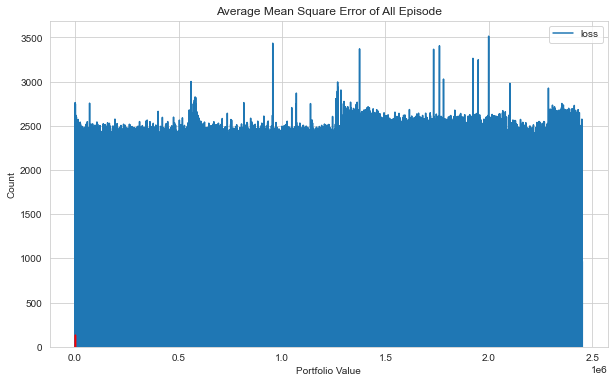

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

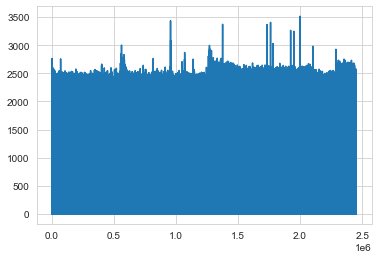

In [5]:
plt.plot(agent.model.losses)

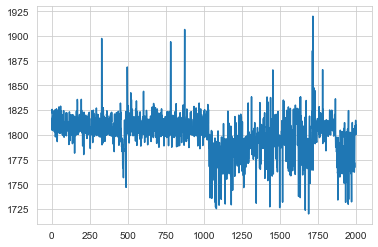

In [6]:
plt.plot(portfolio_value)

episode end value: 1174.69, duration: 0:00:00.107023
Sell: 22 times, Buy: 33 times


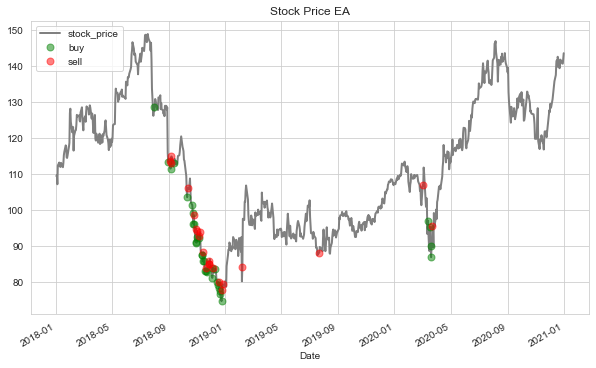

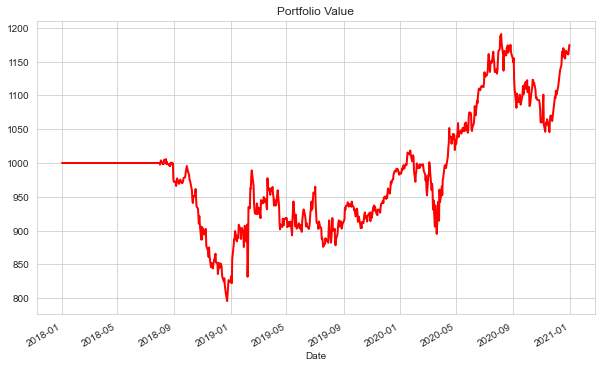

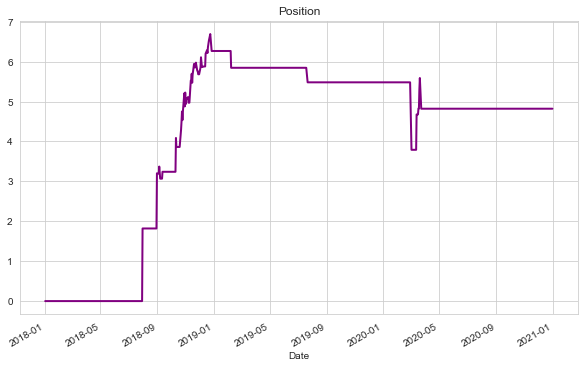

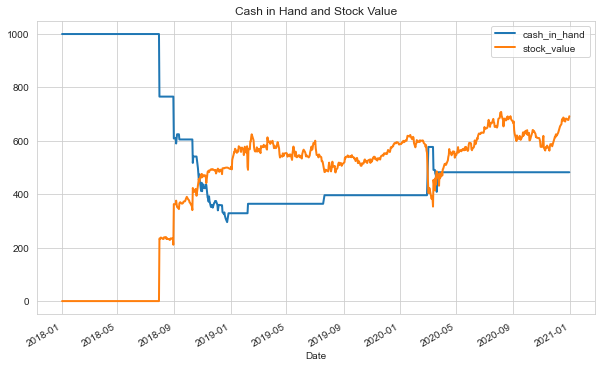

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: EA
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 5.51 %
Volatility: 0.1789
shape ratio: 0.2467
Maximun drawdown: -20.89 %
Calmar ratio: 0.2639
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 9.47 %
Volatility (benchmark): 0.3513
shape ratio: 0.2384
Maximun drawdown: -49.83 %
Calmar ratio (benchmark): 0.1901


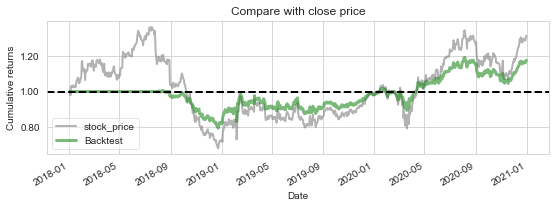

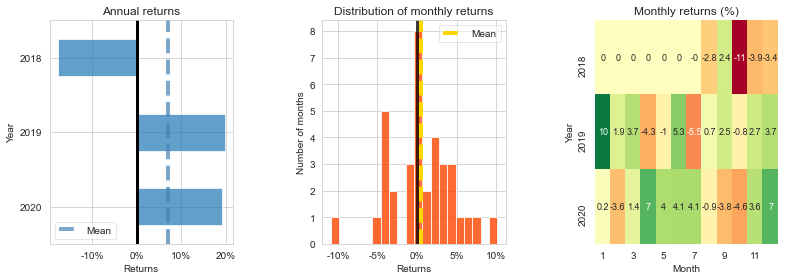

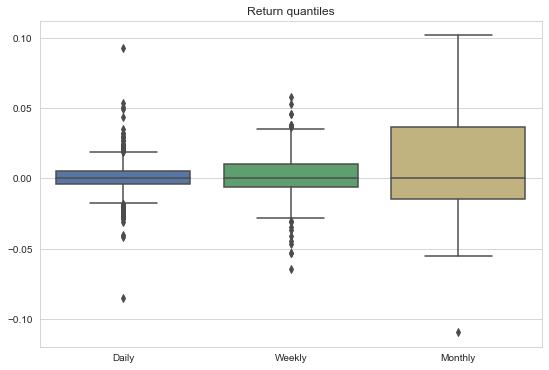

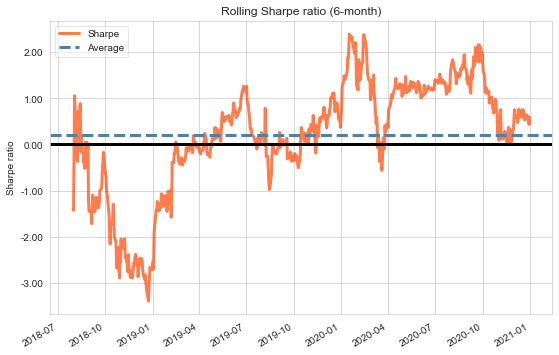

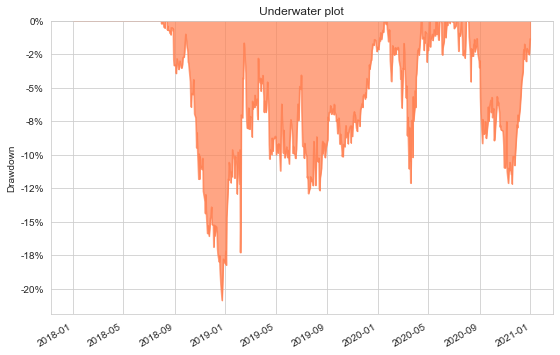

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')